In [10]:
import sys
sys.path.append("./modules/TDDFA_V2")

import cv2
import yaml
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
import modules.TDDFA_V2.utils.uv as uv_utils
from datetime import datetime
from subprocess import Popen, PIPE
from tqdm import tqdm
from modules.TDDFA_V2.utils.tddfa_util import _to_ctype
from modules.TDDFA_V2.Sim3DR import rasterize
from modules.TDDFA_V2.utils.uv import uv_tex, bilinear_interpolate
from modules.TDDFA_V2.FaceBoxes import FaceBoxes
from modules.TDDFA_V2.TDDFA import TDDFA

In [2]:
cfg = yaml.load(open("configs/mb05_120x120.yml"), Loader=yaml.SafeLoader)
tddfa = TDDFA(gpu_mode=False, **cfg)
faceboxes = FaceBoxes()

In [11]:
with open("./core/tri.pkl", "rb") as f:
    __tri__ = pickle.load(f)

In [3]:
frame = cv2.imread("sample.jpg")

In [4]:
boxes = faceboxes(frame)
param_lst, roi_box_lst = tddfa(frame, boxes, crop_policy="box")
ver = tddfa.recon_vers(param_lst, roi_box_lst, DENSE_FLAG=True)[0]
uv_texture = uv_tex(frame, [ver], tddfa.tri, uv_h=256, uv_w=256)
ver_c = _to_ctype(ver.T)
colors = bilinear_interpolate(frame, ver_c[:, 0], ver_c[:, 1]) / 255.

In [7]:
result = rasterize(ver_c, tddfa.tri, colors, bg=np.zeros_like(frame))

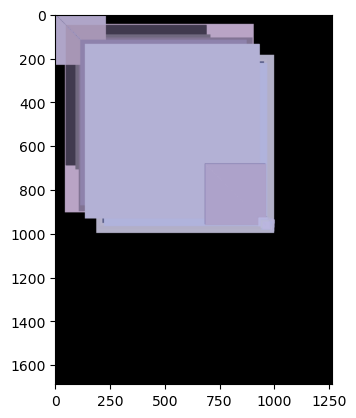

In [8]:
plt.imshow(result)
plt.show()

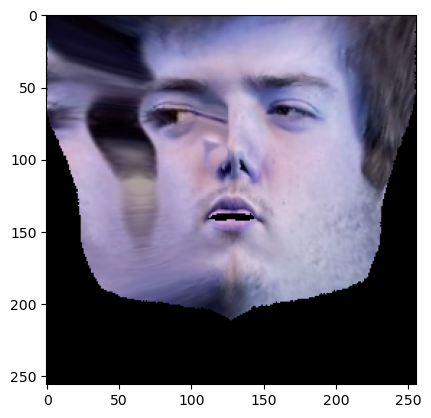

In [13]:
plt.imshow(uv_texture)
plt.show()

In [14]:
uv_cords = uv_utils.process_uv(uv_utils.g_uv_coords.copy(), uv_h=256, uv_w=256)
uv_cords = _to_ctype(uv_cords)

In [15]:
reconstructed_colors = bilinear_interpolate(uv_texture, uv_cords[:, 0], uv_cords[:, 1]) / 255.

In [16]:
result_reconst = rasterize(ver_c, __tri__, reconstructed_colors, bg=np.zeros_like(frame))

In [ ]:
def rasterize_uv(uv_cords)

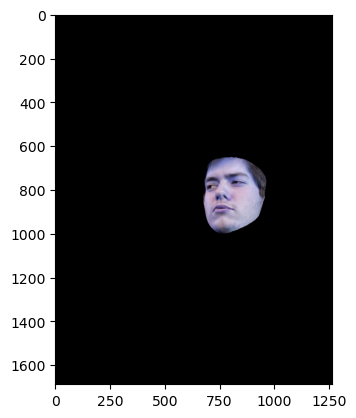

In [17]:
plt.imshow(result_reconst)
plt.show()